In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import numpy.random as rnd

%matplotlib inline
points = np.concatenate([rnd.multivariate_normal((0,0),np.array([[1,0],[0,1]]),20),
                         rnd.multivariate_normal((5,2),np.array([[1,0],[0,1]]),20),
                         rnd.multivariate_normal((2,7),np.array([[1,0],[0,1]]),20)],
                        axis=0)

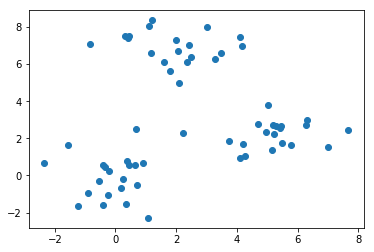

In [13]:
plt.scatter(points[:,0], points[:,1])

In [6]:
from sklearn.cluster import KMeans

In [7]:
model = KMeans(3)
model.fit(points)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [15]:
model.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [14]:
model.cluster_centers_

array([[ 1.9358629 ,  6.89863464],
       [ 5.17066162,  2.200351  ],
       [-0.13040603, -0.10046635]])

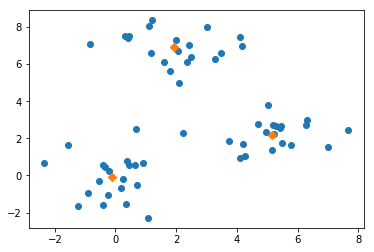

In [23]:
plt.scatter(points[:,0], points[:,1])
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], marker="D")
plt.show()

In [24]:
model.inertia_

124.37204642647279

---

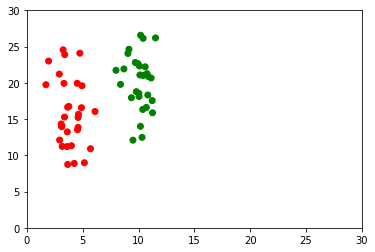

In [37]:
rnd.seed(1)

n = 30

points = np.concatenate([rnd.multivariate_normal((4,15),np.array([[1,0],[0,30]]),n),

                    rnd.multivariate_normal((10,20),np.array([[1,0],[0,30]]),n)],axis=0)

labels = np.repeat([0,1],n)

plt.scatter(points[:,0],points[:,1],c = np.array(["red","green"])[labels])
plt.xlim(0,30)
plt.ylim(0,30)
plt.show()

In [40]:
model = KMeans(4)
pred_labels = model.fit_predict(points)
pred_labels

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 3, 2, 2, 2, 2, 3, 2, 2, 3, 2, 3, 2, 2, 3,
       2, 2, 3, 2, 3, 3, 3, 2, 3, 2, 3, 3, 2, 2, 3, 2], dtype=int32)

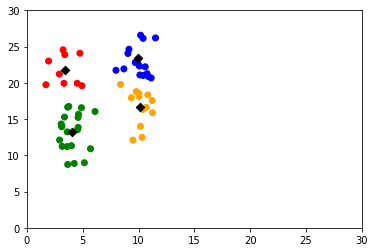

In [44]:
plt.scatter(points[:,0],points[:,1],c = np.array(["red","green","blue", "orange"])[pred_labels])
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], c='k', marker="D")
plt.xlim(0,30)
plt.ylim(0,30)
plt.show()

In [57]:
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler

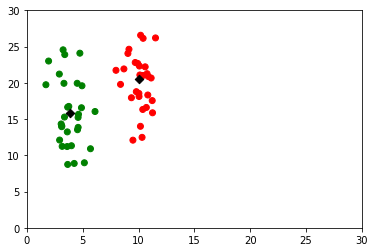

In [67]:
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('kmeans', KMeans(2))
])


pred_labels = pipe.fit_predict(points)
centers = pipe.steps[0][1].inverse_transform(pipe.steps[1][1].cluster_centers_)

plt.scatter(points[:,0],points[:,1],c = np.array(["red","green"])[pred_labels])
plt.scatter(centers[:,0], centers[:,1], c='k', marker="D")
plt.xlim(0,30)
plt.ylim(0,30)
plt.show()

---

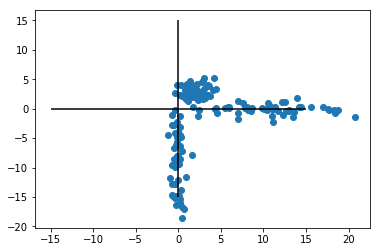

In [101]:
rnd.seed(123)

points = np.concatenate([rnd.multivariate_normal((2,3),np.array([[1,0],[0,1]]),50),
                        rnd.multivariate_normal((10,0),np.array([[30,0],[0,0.5]]),50),
                        rnd.multivariate_normal((0,-8),np.array([[0.3,0],[0,30]]),50)], axis = 0)

plt.scatter(points[:,0],points[:,1])
plt.hlines(0,-15,15)
plt.vlines(0,-15,15)
plt.show()

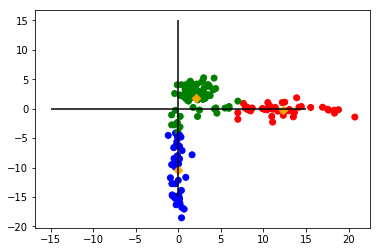

In [80]:
pipe = Pipeline([
    ('scaler', StandardScaler(with_mean=True, with_std=True)),
    ('kmeans', KMeans(3))
])

pred_labels = pipe.fit_predict(points)
centers = pipe.steps[0][1].inverse_transform(pipe.steps[1][1].cluster_centers_)

plt.scatter(points[:,0],points[:,1],c = np.array(["red","green","blue"])[pred_labels])
plt.scatter(centers[:,0], centers[:,1], c='orange', marker="D")
plt.hlines(0,-15,15)
plt.vlines(0,-15,15)
plt.show()

In [ ]:
from numpy import sg

In [ ]:
np.sig

In [94]:
def squeze(x):
    return np.sign(x)*(np.log(abs(x+1)))

In [96]:
new_points = squeze(points)

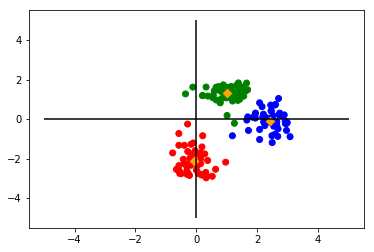

In [100]:
def squeze(x):
    return np.sign(x)*(np.log(abs(x)+1))

new_points = squeze(points)

pipe = Pipeline([
    ('scaler', StandardScaler(with_mean=True, with_std=True)),
    ('kmeans', KMeans(3))
])

pred_labels = pipe.fit_predict(new_points)
centers = pipe.steps[0][1].inverse_transform(pipe.steps[1][1].cluster_centers_)

plt.scatter(new_points[:,0],new_points[:,1],c = np.array(["red","green","blue"])[pred_labels])
plt.scatter(centers[:,0], centers[:,1], c='orange', marker="D")
p=5
plt.hlines(0,-p,p)
plt.vlines(0,-p,p)
plt.show()

In [103]:
from sklearn.preprocessing import PowerTransformer

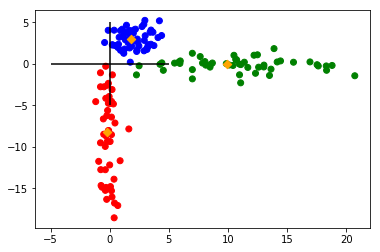

In [108]:
pipe = Pipeline([
    ('power_tr', PowerTransformer(standardize=False)),
    ('scaler', StandardScaler(with_mean=True, with_std=True)),
    ('kmeans', KMeans(3))
])

pred_labels = pipe.fit_predict(points)
centers = pipe.steps[0][1].inverse_transform(pipe.steps[1][1].inverse_transform(pipe.steps[2][1].cluster_centers_))

plt.scatter(points[:,0],points[:,1],c = np.array(["red","green","blue"])[pred_labels])
plt.scatter(centers[:,0], centers[:,1], c='orange', marker="D")
p=5
plt.hlines(0,-p,p)
plt.vlines(0,-p,p)
plt.show()

In [109]:
from sklearn.preprocessing import Normalizer

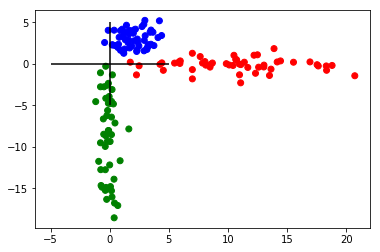

In [119]:
pipe = Pipeline([
    ('power_tr', Normalizer("l2")),
    ('scaler', StandardScaler(with_mean=False, with_std=False)),
    ('kmeans', KMeans(3))
])

pred_labels = pipe.fit_predict(points)

plt.scatter(points[:,0],points[:,1],c = np.array(["red","green","blue"])[pred_labels])

p=5
plt.hlines(0,-p,p)
plt.vlines(0,-p,p)
plt.show()

In [125]:
import seaborn as sns
colors = np.array(sns.color_palette("Set2", 20))
points = np.concatenate([rnd.multivariate_normal((0,0),np.array([[1,0],[0,1]]),20),
                         rnd.multivariate_normal((5,2),np.array([[1,0],[0,1]]),20),
                         rnd.multivariate_normal((2,7),np.array([[1,0],[0,1]]),20)],axis=0)

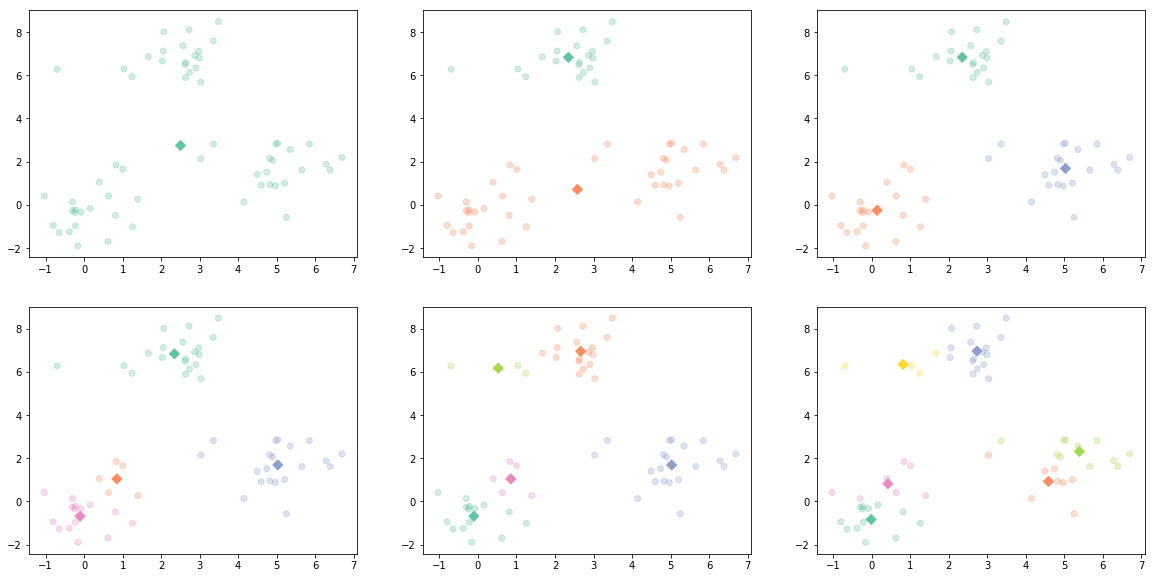

In [144]:
ks = range(1, 7)

inertias = []

plt.figure(figsize=(20,10))

for k in ks:

    model = KMeans(n_clusters=k)
    model.fit(points)
    labels = model.labels_
    inertias.append(model.inertia_)
    plt.subplot(2,3,k)
    plt.scatter(points[:,0],points[:,1],c=colors[labels],alpha=0.3)
    plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],marker="D",c=colors[:k],s=50)

plt.show()

In [142]:
model.cluster_centers_[:,0]

array([2.50352085])

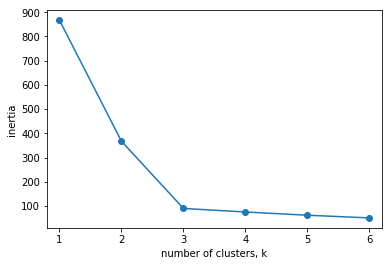

In [145]:
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.xlim(0.8,6.2)
plt.show()

In [148]:
from sklearn.metrics import silhouette_score

ks = range(2, 7)

silhouette = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(points)
    silhouette.append(silhouette_score(points, model.predict(points)))

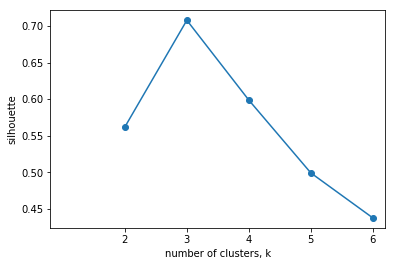

In [151]:
plt.plot(ks, silhouette, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('silhouette')
plt.xticks(ks)
plt.xlim(0.8,6.2)
plt.show()

---

In [256]:
all_data = pd.read_csv("fish.csv", sep=";", decimal=",")
data = all_data.iloc[:,:-1]
y = all_data.iloc[:,-1]

In [170]:
all_data[:3]

,Weight,Length1,Length2,Length3,Height,Width,Species
0,242.0,23.2,25.4,30.0,38.4,13.4,1
1,290.0,24.0,26.3,31.2,40.0,13.8,1
2,340.0,23.9,26.5,31.1,39.8,15.1,1


In [172]:
labels[:3]

0    1
1    1
2    1
Name: Species, dtype: int64

In [198]:
data_tr[:3]

array([[-0.47554358, -0.67277143],
       [-0.25135724, -0.91735257],
       [-0.1546128 , -1.30745843]])

In [199]:
labels.unique()

array([1, 2, 3, 4, 5, 6, 7])

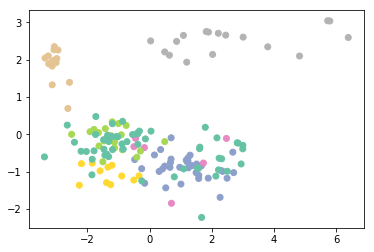

In [200]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

pre_pipe = make_pipeline(StandardScaler(), PCA(2))
data_tr = pre_pipe.fit_transform(data)

plt.scatter(data_tr[:,0], data_tr[:,1], c = colors[1:9][labels])

---

In [213]:
scaler = StandardScaler()
data_sc = scaler.fit_transform(data)

In [214]:
data_sc[:3]

array([[-4.37760645e-01, -3.02868120e-01, -2.79396526e-01,
        -1.02465065e-01,  1.22655044e+00, -3.16455857e-01],
       [-3.03662974e-01, -2.22812640e-01, -1.95382599e-01,
         9.82093272e-04,  1.42001893e+00, -1.40554273e-01],
       [-1.63977900e-01, -2.32819575e-01, -1.76712837e-01,
        -7.63850323e-03,  1.39583537e+00,  4.31125877e-01]])

In [220]:
ks = range(2, 20)

inertias = []
silhouette = []

for k in ks:
    
    model = KMeans(n_clusters=k)
    model.fit(data_sc)
    
    inertias.append(model.inertia_)
    silhouette.append(silhouette_score(data_sc, model.predict(data_sc)))

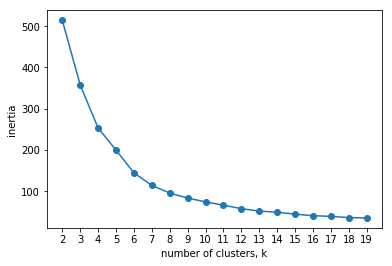

In [221]:
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)

plt.show()

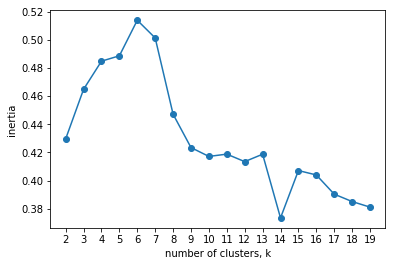

In [222]:
plt.plot(ks, silhouette, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)

plt.show()

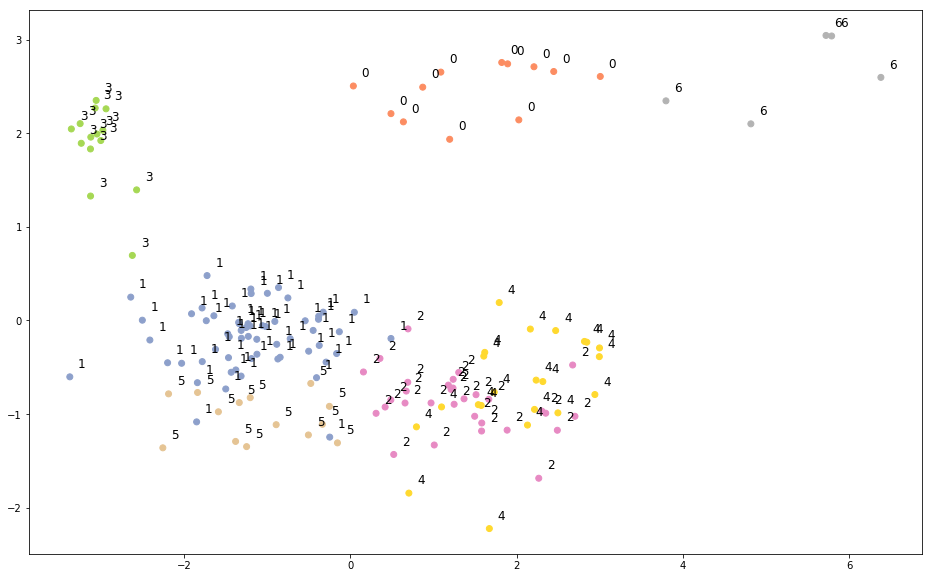

In [273]:
import seaborn as sns
colors = np.array(sns.color_palette("Set2", 20))
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

data = pd.read_csv("fish.csv", sep=";", decimal=",").iloc[:,:-1]
data_sc = StandardScaler().fit_transform(data)
data_sc_2d = PCA(2).fit_transform(data_sc)
labels = KMeans(7).fit(data_sc).labels_

plt.figure(figsize=(16,10))
plt.scatter(data_sc_2d[:,0], data_sc_2d[:,1], c = colors[1:9][labels])

for i, label in enumerate(labels):
    plt.annotate(label, (data_sc_2d[i,0]+.1,data_sc_2d[i,1]+.1), size=12)

plt.show()

In [278]:
pd.crosstab(y, labels)

col_0,0,1,2,3,4,5,6
Species,,,,,,,
1,0,0,0,31,0,0,3
2,0,3,3,0,0,0,0
3,0,20,0,0,0,0,0
4,0,0,0,0,0,0,11
5,0,0,0,0,14,0,0
6,5,0,0,0,0,12,0
7,0,37,19,0,0,0,0


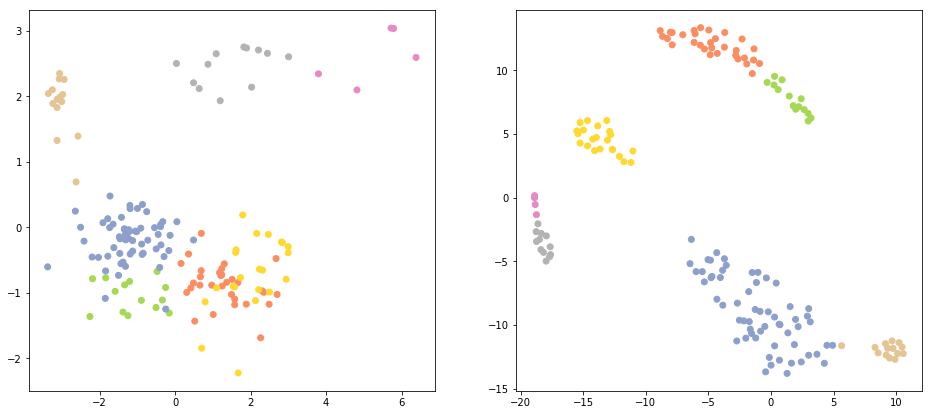

In [283]:
import seaborn as sns
colors = np.array(sns.color_palette("Set2", 20))
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

data = pd.read_csv("fish.csv", sep=";", decimal=",").iloc[:,:-1]
data_sc = StandardScaler().fit_transform(data)

data_sc_2d_pca = PCA(2).fit_transform(data_sc)
data_sc_2d_tsne = TSNE(2, perplexity=20).fit_transform(data_sc)
labels = KMeans(7).fit(data_sc).labels_

plt.figure(figsize=(16,7))
plt.subplot(1,2,1)
plt.scatter(data_sc_2d_pca[:,0], data_sc_2d_pca[:,1], c = colors[1:9][labels])

plt.subplot(1,2,2)
plt.scatter(data_sc_2d_tsne[:,0], data_sc_2d_tsne[:,1], c = colors[1:9][labels])


plt.show()

---

In [284]:
from scipy.cluster.hierarchy import linkage, dendrogram

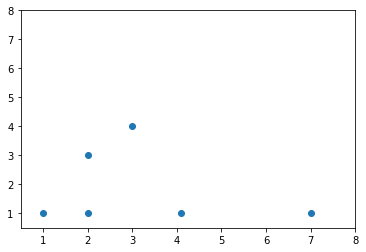

In [285]:
dane = np.array([[1,1],[2,1],[4.1,1],[7,1],[2,3],[3,4]])
plt.scatter(dane[:,0],dane[:,1])
plt.xlim(0.5,8)
plt.ylim(0.5,8)
plt.show()

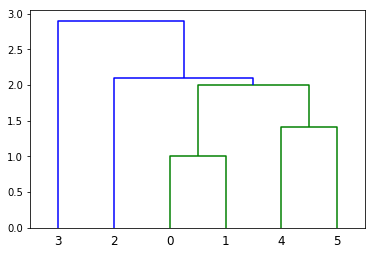

In [286]:
d = linkage(dane)
dendrogram(d)
plt.show()

In [287]:
d

array([[0.        , 1.        , 1.        , 2.        ],
       [4.        , 5.        , 1.41421356, 2.        ],
       [6.        , 7.        , 2.        , 4.        ],
       [2.        , 8.        , 2.1       , 5.        ],
       [3.        , 9.        , 2.9       , 6.        ]])

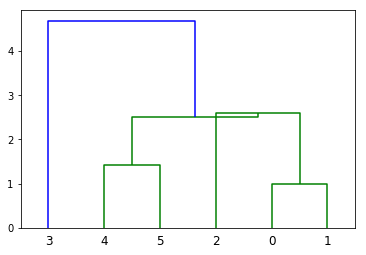

In [290]:
d = linkage(dane, 'centroid')
dendrogram(d)
plt.show()

In [289]:
d

array([[0.        , 1.        , 1.        , 2.        ],
       [4.        , 5.        , 1.41421356, 2.        ],
       [2.        , 3.        , 2.9       , 2.        ],
       [6.        , 7.        , 3.80788655, 4.        ],
       [8.        , 9.        , 6.14600141, 6.        ]])

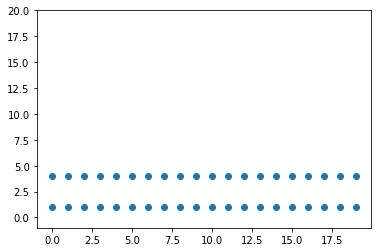

In [292]:
x = np.vstack([np.tile(range(20),2),np.repeat(np.array([1,4]),20)]).T
plt.scatter(x[:,0],x[:,1])
plt.ylim(-1,20)
plt.show()

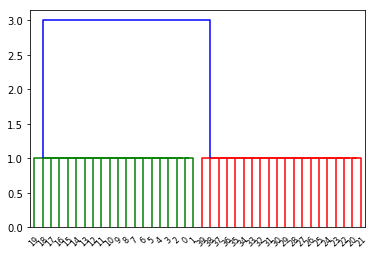

In [294]:
d = linkage(x, 'single')
dendrogram(d)
plt.show()

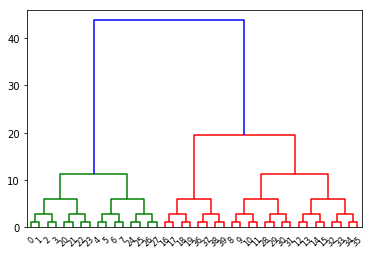

In [295]:
d = linkage(x, 'ward')
dendrogram(d)
plt.show()

In [297]:
from scipy.cluster.hierarchy import fcluster

In [298]:
fcluster(d, 15, criterion='distance')

array([1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2], dtype=int32)

In [299]:
from sklearn.cluster import AgglomerativeClustering

In [300]:
?AgglomerativeClustering

In [301]:
from scipy.io import loadmat
dane = loadmat("eu_song_2014.mat")["x"][0][0][0]
k1 = loadmat("eu_song_2014.mat")["x"][0][0][1][0][0]
k2 = loadmat("eu_song_2014.mat")["x"][0][0][5]
dane = pd.DataFrame(dane,columns=k2)
dane.set_index(k1,inplace=True)
dane.head()

,Ukraine,Belarus,Azerbaijan,Iceland,Norway,Romania,Armenia,Montenegro,Greece,Poland,...,Slovenia,Finland,Spain,Switzerland,Hungary,Malta,Denmark,Netherlands,San Marino,United Kingdom
Albania,0,0,0,0,0,0,0,6,0,2,...,0,0,12,0,8,1,0,0,3,0
Armenia,0,8,0,0,0,0,0,12,0,7,...,0,0,2,5,0,0,1,4,3,0
Austria,5,0,0,2,1,8,12,0,0,0,...,0,4,0,3,7,0,0,10,0,0
Azerbaijan,10,7,0,0,0,6,0,0,2,4,...,0,0,0,0,8,5,0,0,3,0
Belarus,8,0,3,0,4,1,10,0,7,6,...,0,0,0,0,5,0,0,2,0,0


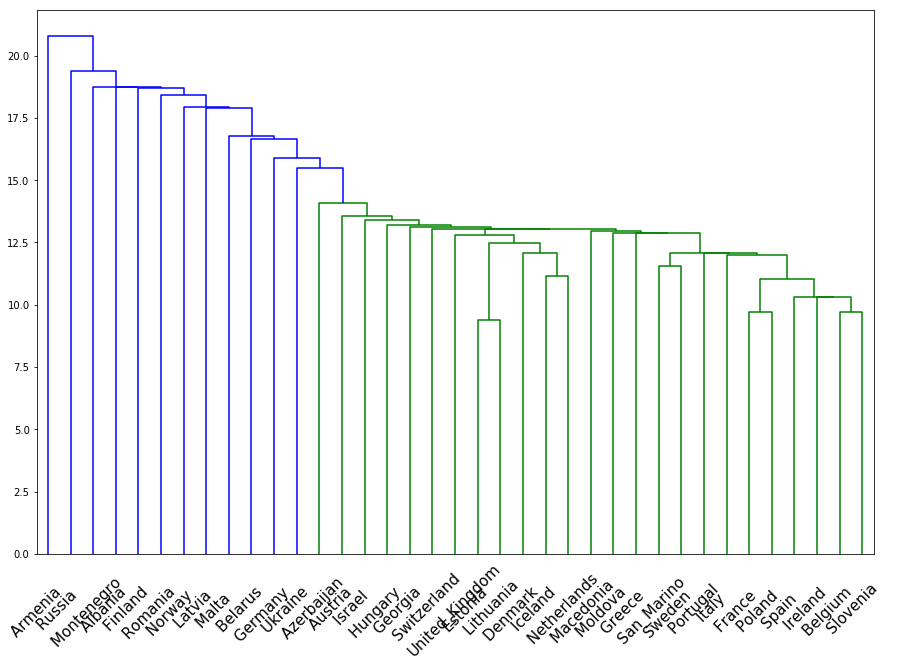

In [305]:
d=linkage(dane)
plt.figure(figsize=(15,10))
dendrogram(d,
          labels = dane.index,
          leaf_rotation=45,
          leaf_font_size=15)
plt.show()

In [318]:
dane.columns

Index(['Ukraine       ', 'Belarus       ', 'Azerbaijan    ', 'Iceland       ',
       'Norway        ', 'Romania       ', 'Armenia       ', 'Montenegro    ',
       'Greece        ', 'Poland        ', 'Austria       ', 'Germany       ',
       'Sweden        ', 'France        ', 'Russia        ', 'Italy         ',
       'Slovenia      ', 'Finland       ', 'Spain         ', 'Switzerland   ',
       'Hungary       ', 'Malta         ', 'Denmark       ', 'Netherlands   ',
       'San Marino    ', 'United Kingdom'],
      dtype='object')

In [317]:
dane['Albania']

KeyError: 'Albania'

In [316]:
pd.Series(dane.index).str.strip()[:3]

0    Albania
1    Armenia
2    Austria
dtype: object

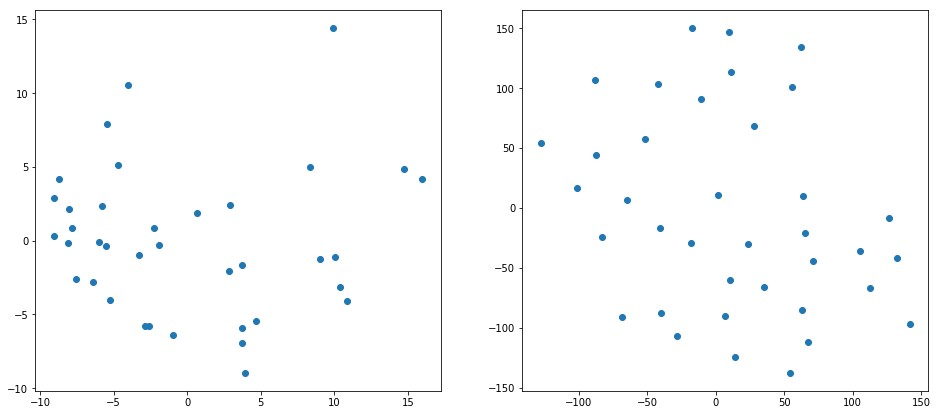

In [323]:
data_sc_2d_pca = PCA(2).fit_transform(dane)
data_sc_2d_tsne = TSNE(2, perplexity=10).fit_transform(dane)
labels = KMeans(7).fit(data_sc).labels_

plt.figure(figsize=(16,7))
plt.subplot(1,2,1)
plt.scatter(data_sc_2d_pca[:,0], data_sc_2d_pca[:,1])

plt.subplot(1,2,2)
plt.scatter(data_sc_2d_tsne[:,0], data_sc_2d_tsne[:,1])


plt.show()